In [32]:
import pandas as pd

df=pd.read_csv('bank-full.csv',sep=';')
print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [33]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [34]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [36]:
categorial_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64']).columns

In [37]:
categorial_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [38]:
for col in categorial_columns:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts())
    print("\n")

Value counts for column 'job':
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


Value counts for column 'marital':
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


Value counts for column 'education':
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


Value counts for column 'default':
default
no     44396
yes      815
Name: count, dtype: int64


Value counts for column 'housing':
housing
yes    25130
no     20081
Name: count, dtype: int64


Value counts for column 'loan':
loan
no     37967
yes     7244
Name: count, dtype: int64


Value counts for column 'contact':
contact
cellular     29285
unknown      13020
telephone     2906
Name: count,

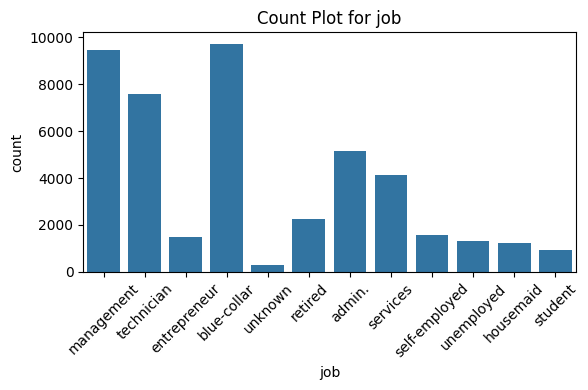

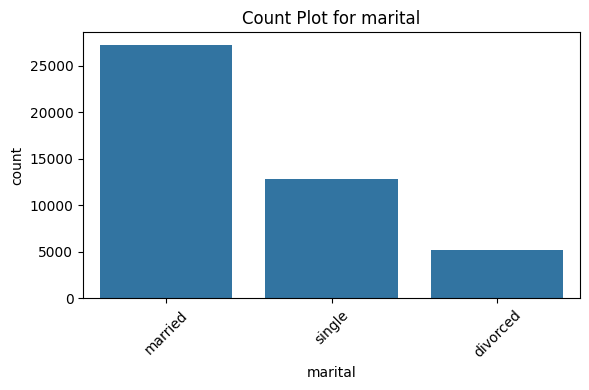

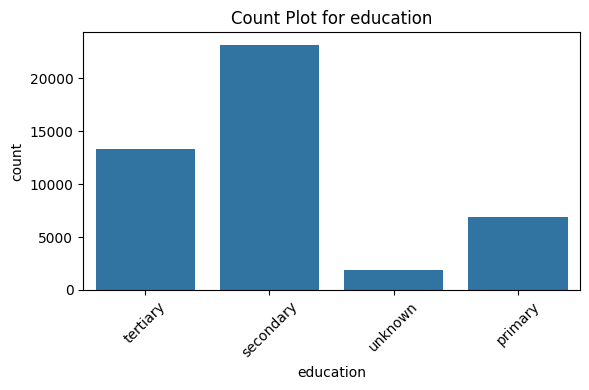

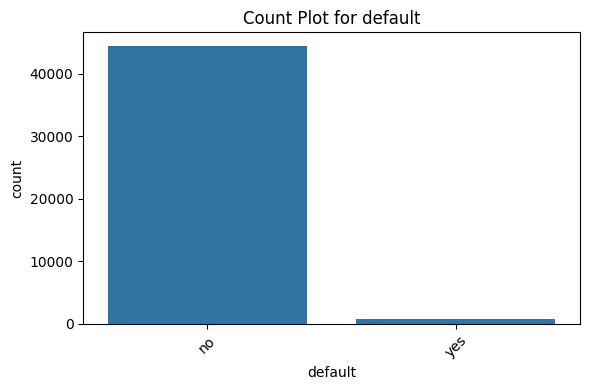

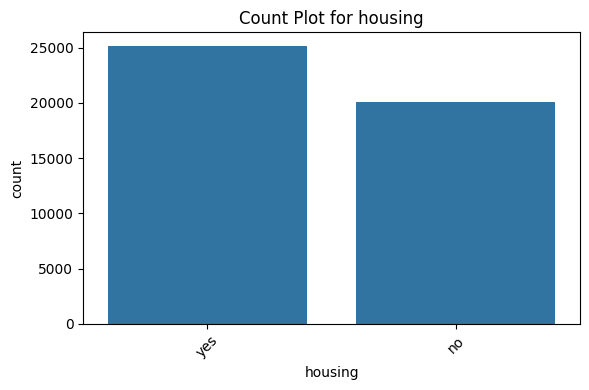

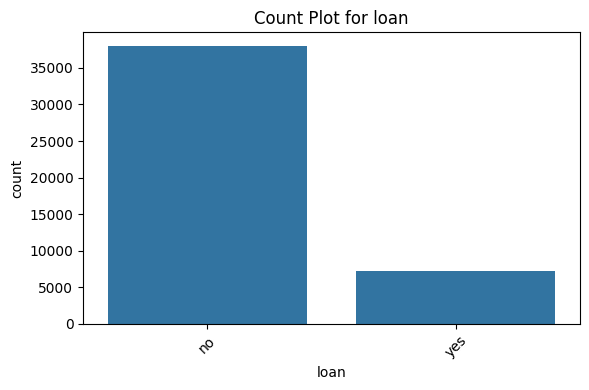

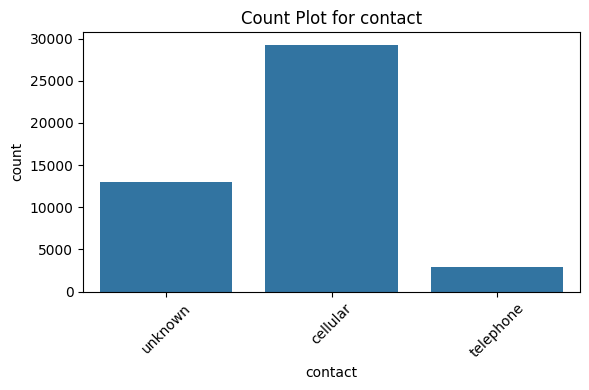

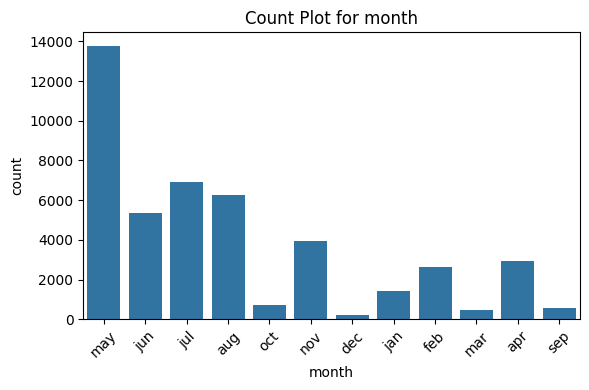

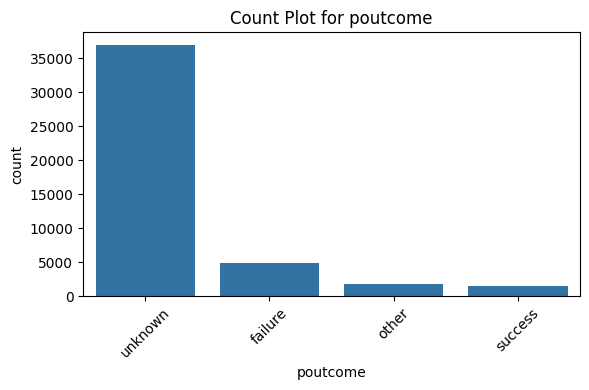

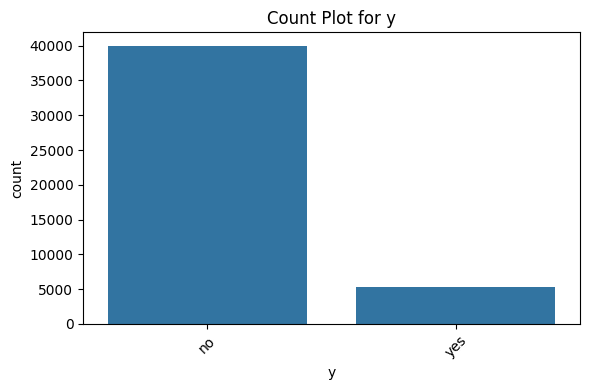

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in categorial_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count Plot for {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [40]:
df_1=df.drop(['default','poutcome'],axis=1)

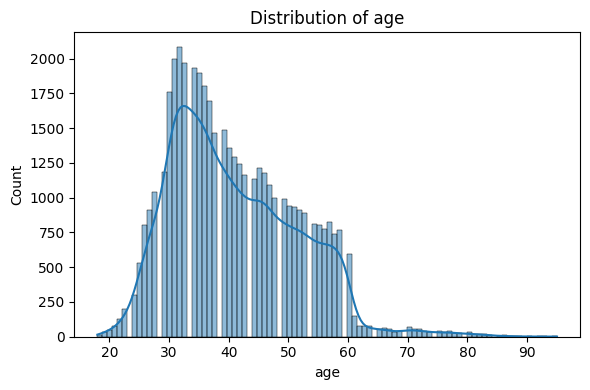

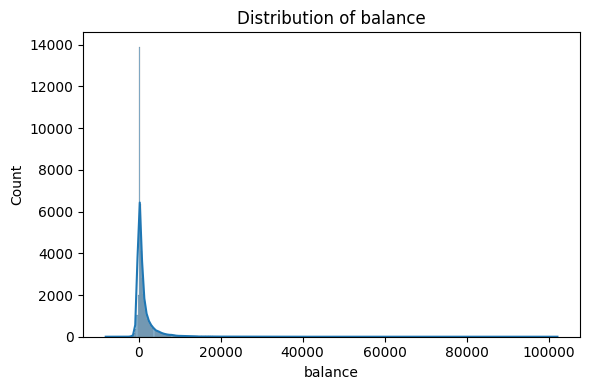

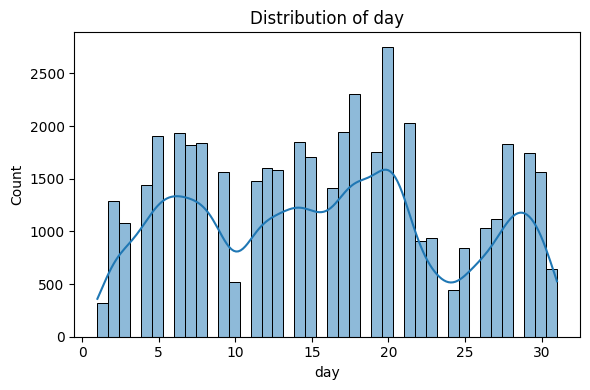

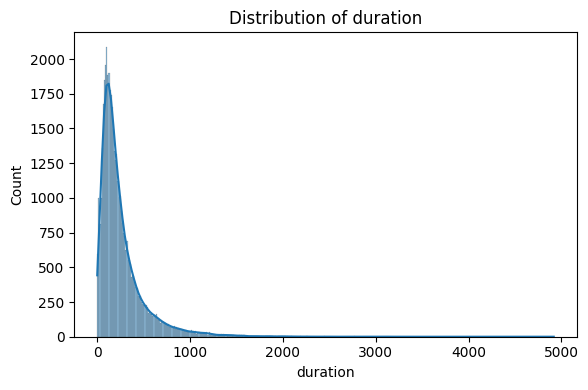

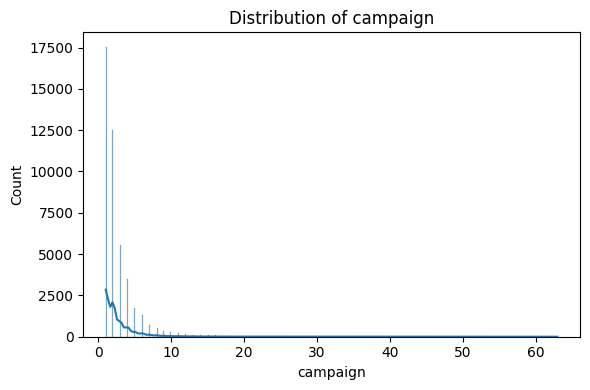

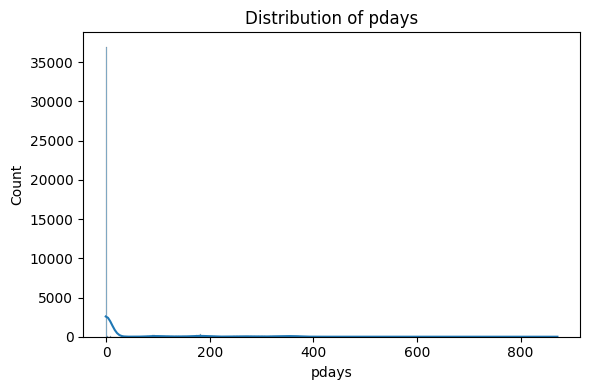

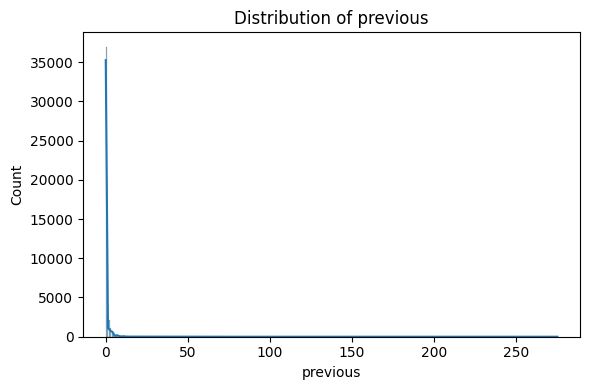

In [41]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_1, x=col, kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

In [42]:
import numpy as np
from scipy.stats import zscore
z_scores = np.abs(df[numerical_columns].apply(zscore))

# Set a threshold (commonly 3)
threshold = 3

# Keep only rows where all Z-scores are below the threshold
df_no_outliers = df[(z_scores < threshold).all(axis=1)]

print(f"Original shape: {df.shape}")
print(f"After outlier removal: {df_no_outliers.shape}")

Original shape: (45211, 17)
After outlier removal: (40209, 17)


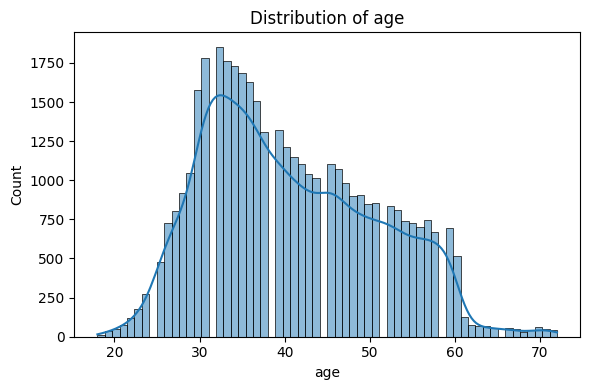

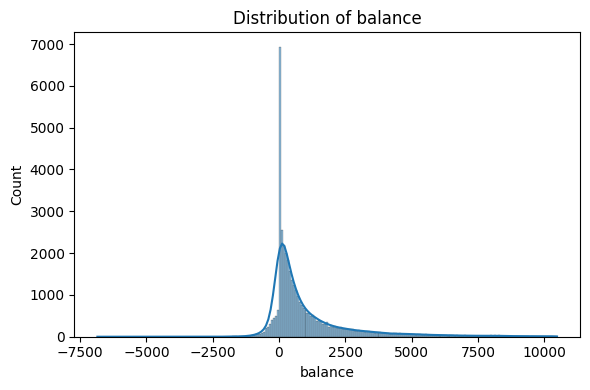

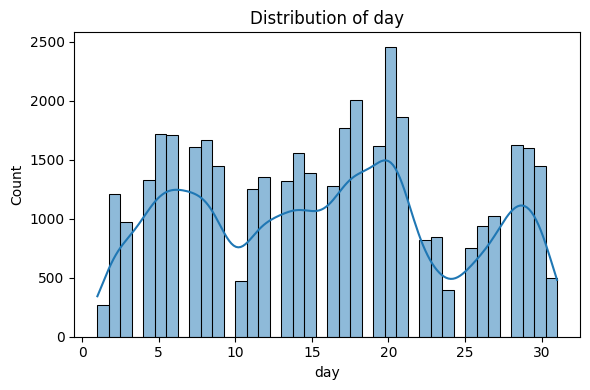

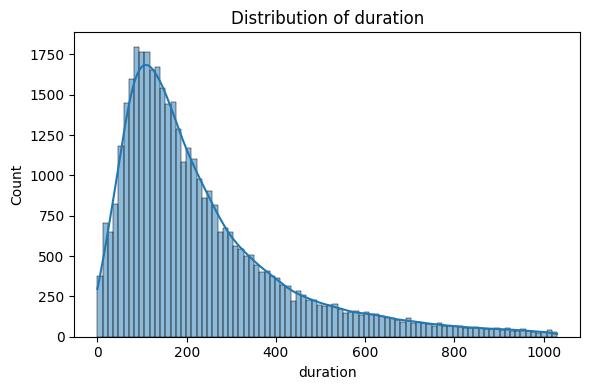

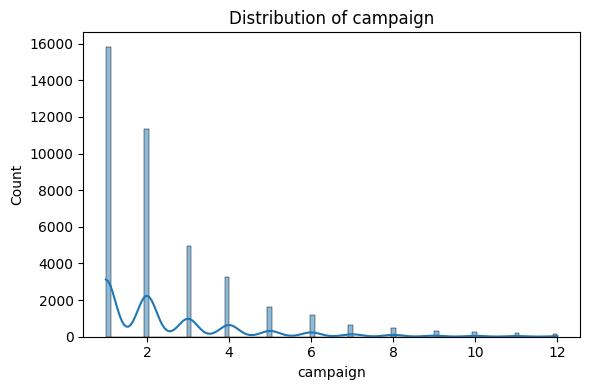

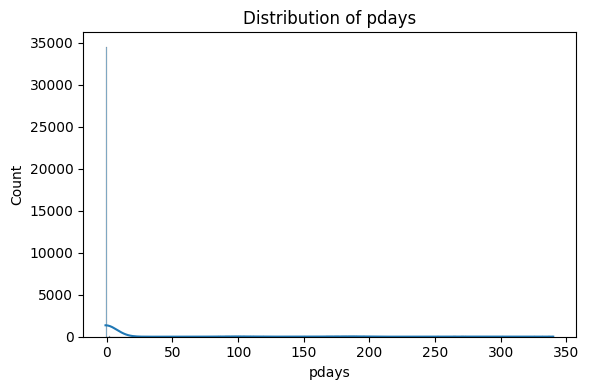

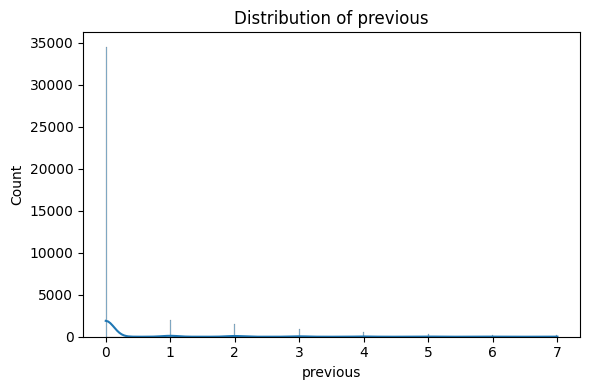

In [43]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_no_outliers, x=col, kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

In [44]:
df_no_outliers['previous_log'] = np.log1p(df_no_outliers['previous'])

C:\Users\04khu\AppData\Local\Temp\ipykernel_17856\1667034543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['previous_log'] = np.log1p(df_no_outliers['previous'])


In [45]:
numerical_columns = numerical_columns.tolist()
numerical_columns.append('previous_log')
numerical_columns.remove('previous')

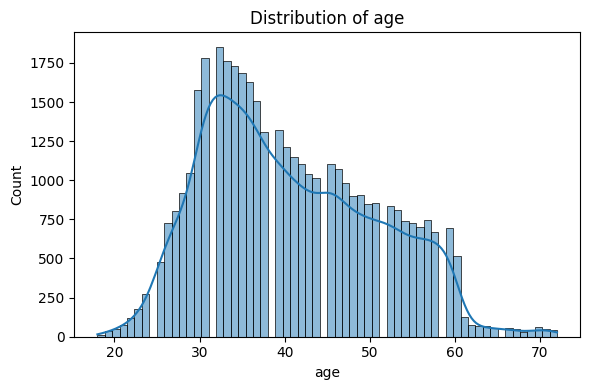

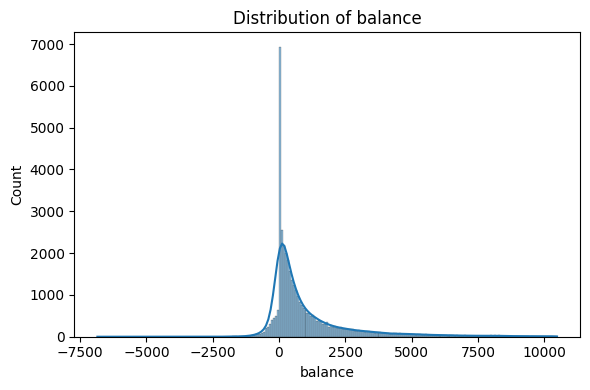

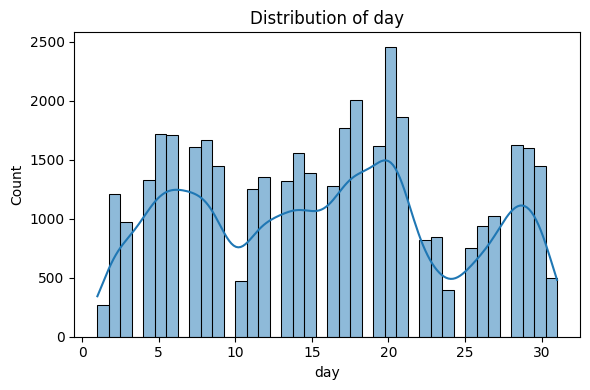

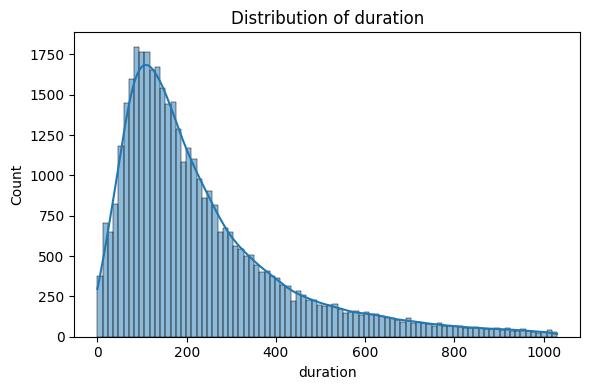

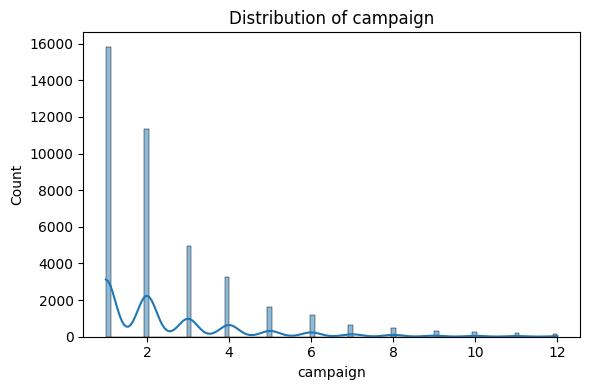

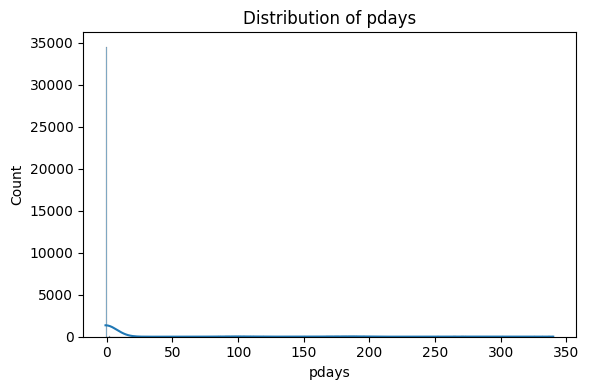

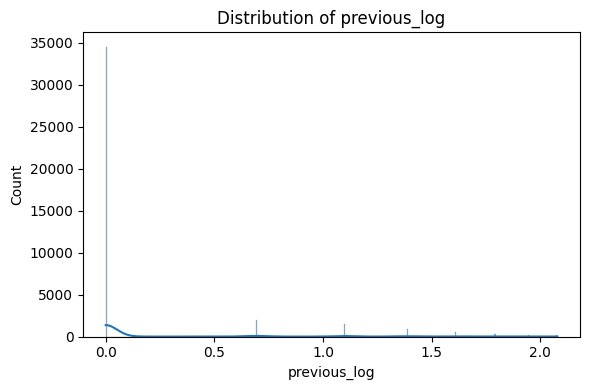

In [46]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_no_outliers, x=col, kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

                   age   balance       day  duration  campaign     pdays  \
age           1.000000  0.094087 -0.010352 -0.025013  0.036492 -0.009888   
balance       0.094087  1.000000  0.010047  0.031384 -0.017348  0.040709   
day          -0.010352  0.010047  1.000000 -0.024773  0.133115 -0.063337   
duration     -0.025013  0.031384 -0.024773  1.000000 -0.077086  0.014537   
campaign      0.036492 -0.017348  0.133115 -0.077086  1.000000 -0.088429   
pdays        -0.009888  0.040709 -0.063337  0.014537 -0.088429  1.000000   
previous      0.008715  0.055668 -0.053733  0.018723 -0.064500  0.719905   
previous_log  0.005797  0.063039 -0.057300  0.018228 -0.084293  0.824426   

              previous  previous_log  
age           0.008715      0.005797  
balance       0.055668      0.063039  
day          -0.053733     -0.057300  
duration      0.018723      0.018228  
campaign     -0.064500     -0.084293  
pdays         0.719905      0.824426  
previous      1.000000      0.968953  
pre

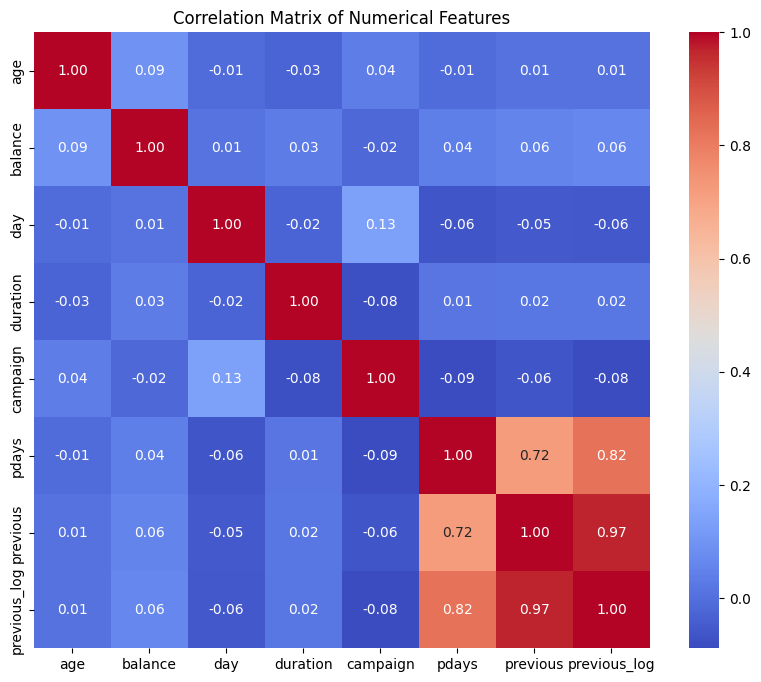

In [47]:
import pandas as pd

# Select only numerical columns
numerical_df = df_no_outliers.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numerical_df.corr()

# Display matrix
print(corr_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [48]:
df_final=df_no_outliers.drop(['previous','pdays'],axis=1)

                   age   balance       day  duration  campaign  previous_log
age           1.000000  0.094087 -0.010352 -0.025013  0.036492      0.005797
balance       0.094087  1.000000  0.010047  0.031384 -0.017348      0.063039
day          -0.010352  0.010047  1.000000 -0.024773  0.133115     -0.057300
duration     -0.025013  0.031384 -0.024773  1.000000 -0.077086      0.018228
campaign      0.036492 -0.017348  0.133115 -0.077086  1.000000     -0.084293
previous_log  0.005797  0.063039 -0.057300  0.018228 -0.084293      1.000000


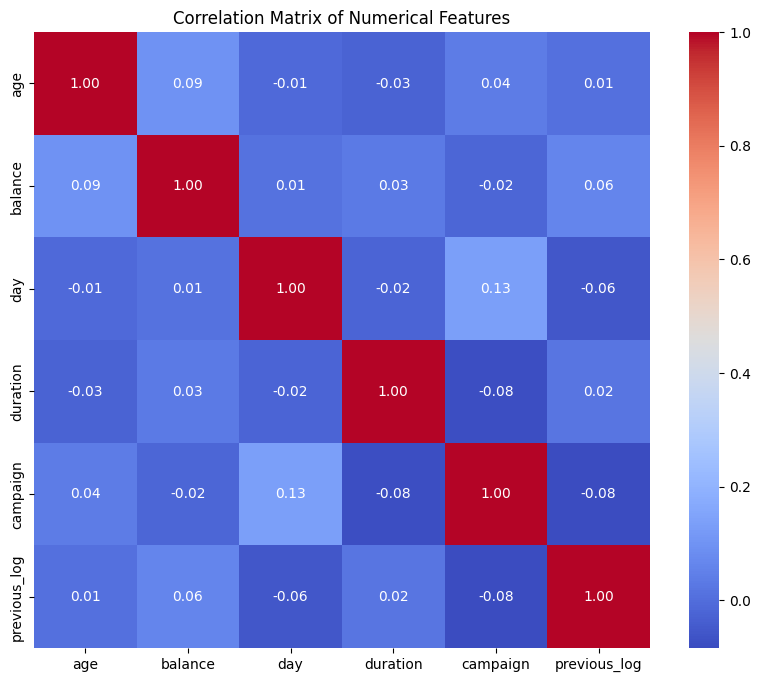

In [49]:
import pandas as pd

# Select only numerical columns
numerical_df = df_final.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numerical_df.corr()

# Display matrix
print(corr_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [50]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40209 entries, 0 to 45209
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           40209 non-null  int64  
 1   job           40209 non-null  object 
 2   marital       40209 non-null  object 
 3   education     40209 non-null  object 
 4   default       40209 non-null  object 
 5   balance       40209 non-null  int64  
 6   housing       40209 non-null  object 
 7   loan          40209 non-null  object 
 8   contact       40209 non-null  object 
 9   day           40209 non-null  int64  
 10  month         40209 non-null  object 
 11  duration      40209 non-null  int64  
 12  campaign      40209 non-null  int64  
 13  poutcome      40209 non-null  object 
 14  y             40209 non-null  object 
 15  previous_log  40209 non-null  float64
dtypes: float64(1), int64(5), object(10)
memory usage: 5.2+ MB


In [51]:
df_final=df_final.drop('poutcome',axis=1)

In [52]:
X=df_final.drop('y',axis=1)
y=df_final['y']

In [53]:
y=y.map({'yes':1,'no':0})

In [54]:
import numpy as np
from collections import Counter

print("Before:", Counter(y))

# Separate majority and minority classes
X_majority = X[y == 0]
X_minority = X[y == 1]

# Oversample minority to match majority count
n_majority = len(X_majority)
n_minority = len(X_minority)
n_to_add = n_majority - n_minority

if n_to_add > 0:
    # Randomly sample with replacement from minority
    indices = np.random.choice(range(n_minority), size=n_to_add, replace=True)
    X_new = X_minority.iloc[indices]  # ✅ use .iloc here
    y_new = np.ones(len(X_new), dtype=int)

    # Combine with original data
    X_resampled = pd.concat([X, X_new], axis=0).reset_index(drop=True)
    y_resampled = np.hstack([y, y_new])
else:
    print("Dataset already balanced.")
    X_resampled, y_resampled = X, y

print("After:", Counter(y_resampled))


Before: Counter({0: 36155, 1: 4054})
After: Counter({np.int64(0): 36155, np.int64(1): 36155})
After: Counter({np.int64(0): 36155, np.int64(1): 36155})


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [56]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        # Ensure z is a numeric numpy array (or scalar) of float dtype
        z = np.asarray(z, dtype=float)
        return 1.0 / (1.0 + np.exp(-z))

    def fit(self, X, y):
        # Convert inputs to numeric numpy arrays to avoid object-dtype issues
        X = np.asarray(X, dtype=float)
        y = np.asarray(y, dtype=float)

        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features, dtype=float)
        self.bias = 0.0

        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1.0 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1.0 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        X = np.asarray(X, dtype=float)
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57848 entries, 68120 to 15795
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           57848 non-null  int64  
 1   job           57848 non-null  object 
 2   marital       57848 non-null  object 
 3   education     57848 non-null  object 
 4   default       57848 non-null  object 
 5   balance       57848 non-null  int64  
 6   housing       57848 non-null  object 
 7   loan          57848 non-null  object 
 8   contact       57848 non-null  object 
 9   day           57848 non-null  int64  
 10  month         57848 non-null  object 
 11  duration      57848 non-null  int64  
 12  campaign      57848 non-null  int64  
 13  previous_log  57848 non-null  float64
dtypes: float64(1), int64(5), object(8)
memory usage: 6.6+ MB


In [58]:
X_train=X_train.drop(['default'],axis=1)
X_test=X_test.drop(['default'],axis=1)

In [59]:
# use label encoding for ['education,month,housing',job,loan]
#use one hot for 'marital','contact'
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_enc_cols = ['education', 'month', 'housing', 'job', 'loan']
onehot_enc_cols = ['marital', 'contact']
# Label Encoding
label_encoders = {}
for col in label_enc_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

# One-Hot Encoding
X_train = pd.get_dummies(X_train, columns=onehot_enc_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=onehot_enc_cols, drop_first=True)




In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57848 entries, 68120 to 15795
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                57848 non-null  int64  
 1   job                57848 non-null  int64  
 2   education          57848 non-null  int64  
 3   balance            57848 non-null  int64  
 4   housing            57848 non-null  int64  
 5   loan               57848 non-null  int64  
 6   day                57848 non-null  int64  
 7   month              57848 non-null  int64  
 8   duration           57848 non-null  int64  
 9   campaign           57848 non-null  int64  
 10  previous_log       57848 non-null  float64
 11  marital_married    57848 non-null  bool   
 12  marital_single     57848 non-null  bool   
 13  contact_telephone  57848 non-null  bool   
 14  contact_unknown    57848 non-null  bool   
dtypes: bool(4), float64(1), int64(10)
memory usage: 5.5 MB


In [61]:
model = LogisticRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X_train.values, y_train)

C:\Users\04khu\AppData\Local\Temp\ipykernel_17856\1253660289.py:13: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test.values)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")

Accuracy: 0.5877471995574609
Confusion Matrix:
[[1589 5670]
 [ 292 6911]]
Classification Report:


C:\Users\04khu\AppData\Local\Temp\ipykernel_17856\1253660289.py:13: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))
